In [54]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  8 09:38:57 2022

@author: Thierry Paquet
"""

#!/usr/bin/env python
# -*- coding: utf-8 -*-


import numpy as np
from sklearn import datasets
from sklearn.cluster import DBSCAN
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
import sklearn.cluster

colors =['k','r','b','g','c','m',]
n_colors = 6

###########################################################################
def EpsilonVoisinage(i,X,Dist,eps):
    N,p =np.shape(X)
    Voisins = [v for v in range(N) if ( i != v and Dist[v,i] < eps)]
    return Voisins

###########################################################################
def etendre_cluster(X, y, Dist, Cluster, no_cluster, Voisins, Visite, eps, minpts):
    for v in Voisins:
       if not Visite[v]:
           Visite[v]=True
           Cluster.append(v)
           y[v]=no_cluster
           vosin_= EpsilonVoisinage(v,X,Dist,eps)
           if len(vosin_)>=minpts:
             for vv in vosin_:
                  if vv not in Voisins:
                     Voisins.append(vv)

    return Cluster, y, Visite

##########################################################################
#              MY DBSCAN
def my_DBSCAN(X, eps, minpts, Visualisation = False):
    N,pp =np.shape(X)
    no_cluster = 0
    
    # on pré-calcule toutes les distances entre points
    Dist = np.reshape(norm(X - X[0,:],axis=1),(N,1))
    for n in range(1,N):
        D = np.reshape(norm(X - X[n,:],axis=1),(N,1))
        Dist = np.concatenate((Dist,D),axis=1)
        
    # eps = estimate_EPS(Dist)
    # minpts = estime_MINPTS(X,Dist,eps)
               
    Visite = [False for _ in range(N)]
    
    y = - np.ones(N)  # tableau des labels des données, initialisé bruit (-1)
    Clusters = []
    
    for p in range(N):
        if not Visite[p]:
           liste=[p]
           Visite[p]=True
           voisins=EpsilonVoisinage(p,X,Dist,eps)
           if len(voisins)>=minpts:
               no_cluster+=1
               y[p]=no_cluster
               liste,y,Visite=etendre_cluster(X,y,Dist,liste,no_cluster,voisins,Visite,eps,minpts)
               Clusters.append(liste)

    if Visualisation :
        print(len(Clusters),' clusters trouvés', no_cluster)
        print("Clusters =",Clusters)
        for cluster in Clusters:
            print('effectif cluster ',len(cluster))
                       
        Bruit = [n for n in range(N) if y[n] == -1]
        print('effectif  bruit',len(Bruit))

    return y,eps,minpts


yy len: 150


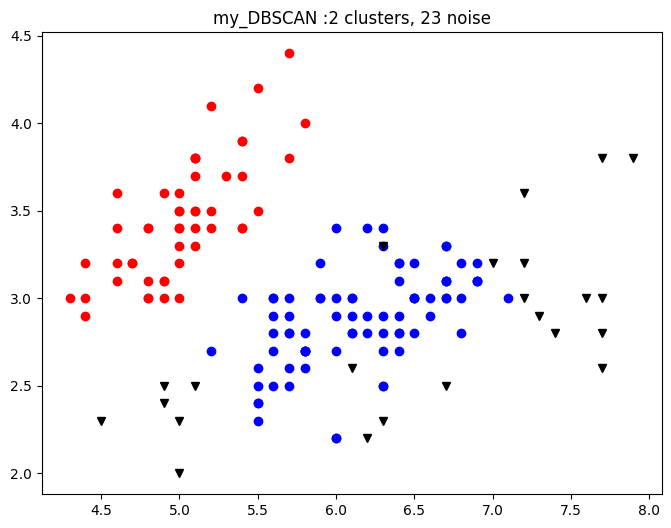

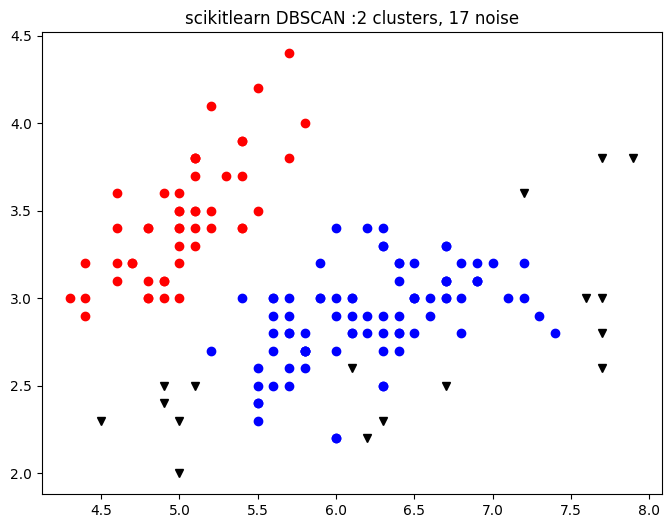

In [20]:
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # fig = plt.figure(2, figsize=(8, 6))
    # plt.clf()
    # plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
    # plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
    # plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')
    # plt.legend(scatterpoints=1)

    eps = 0.5
    minpts = 5
    
    my_y = my_DBSCAN(X,eps,minpts)
    statistiques = np.unique(my_y,return_counts=True)
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
    
    fig = plt.figure(figsize=(8, 6))
    for k in range(1,K+1):
        plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
    plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise')
    plt.savefig('MyDB')
    # comparaison avec DBSCAN de scikit learn
    yy = DBSCAN(eps=eps,min_samples=minpts).fit_predict(X)
    statistiques = np.unique(yy,return_counts=True)
    Noise = [p for p in range(len(yy)) if yy[p]==-1]
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    
    print('yy len:',len(yy))
    fig = plt.figure(figsize=(8, 6))
    for k in range(K):
        plt.plot(X[yy==k, 0], X[yy==k, 1], colors[(k+1)%n_colors]+'o')
    plt.plot(X[yy==-1, 0], X[yy==-1, 1], 'kv')

    plt.title('scikitlearn DBSCAN :'+str(K)+' clusters, '+str(len(Noise))+' noise')
    
    plt.show()    

In [53]:
def visualisation_iris(minpts):
    i=1
    for t in [0.3,0.5,0.7]:
        
        my_y ,s,v= my_DBSCAN(X,t,minpts)
        statistiques = np.unique(my_y,return_counts=True)
        K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
        Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
        
        fig = plt.figure(3, figsize=(18, 5))
        
        plt.subplot(1,3,i)
        for k in range(1,K+1): rendre : jeudi 24 octobre 2024, 23:59
            plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
        plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    
        plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise'+' eps = '+str(t))
        i+=1
    plt.savefig(f'minpts_{minpts}')
    plt.show()

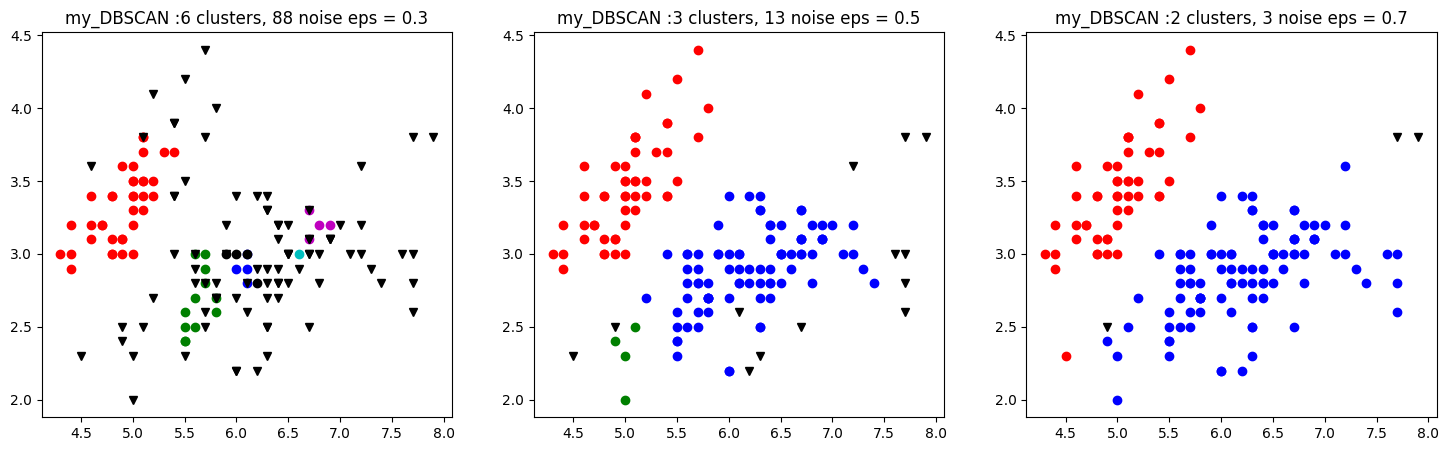

In [14]:
visualisation_iris(3)

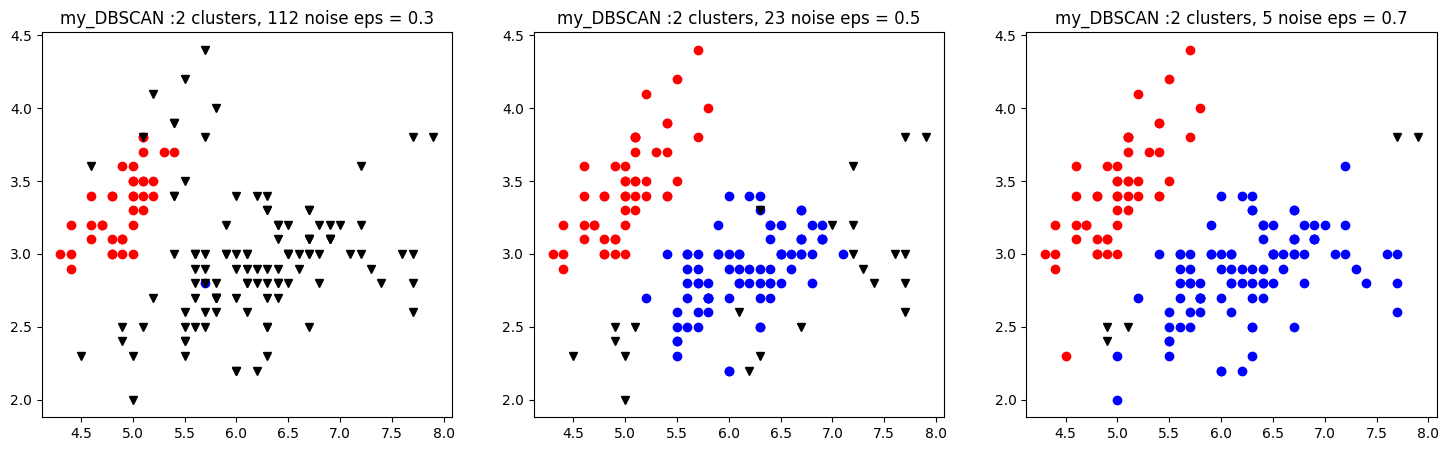

In [15]:
visualisation_iris(5)

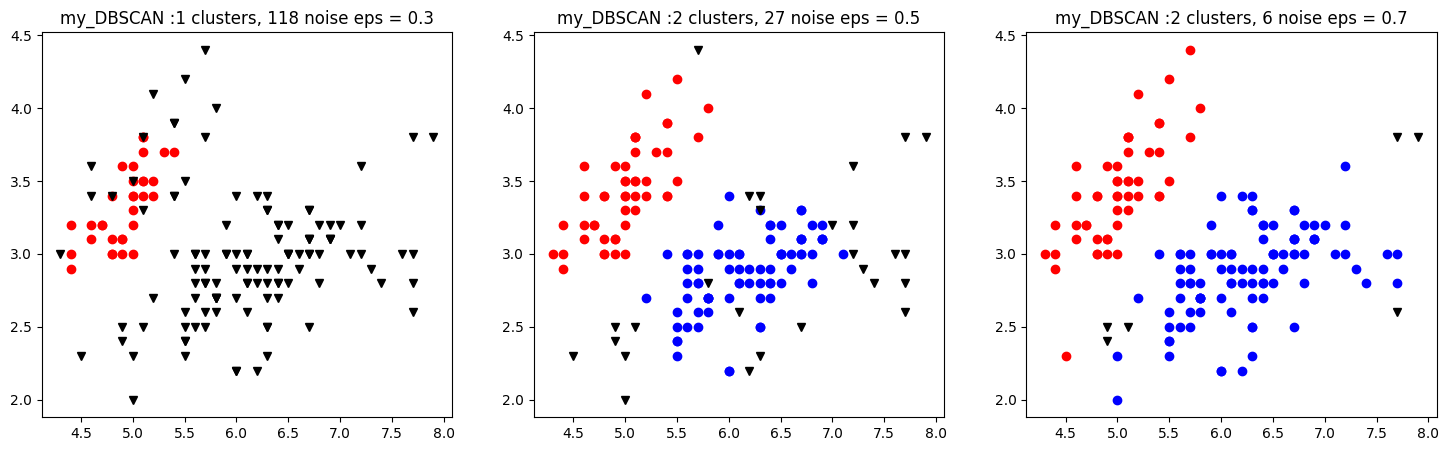

In [16]:
visualisation_iris(7)

In [56]:
def visualisation_cerc(minpts):   
    X, y = make_circles(n_samples=150, factor=0.3, noise=0.1)
    X = StandardScaler().fit_transform(X)
    i=1
    for t in [0.3,0.5,0.7]:
        
        my_y,k,l= my_DBSCAN(X,t,minpts)
        statistiques = np.unique(my_y,return_counts=True)
        K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
        Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
        
        fig = plt.figure(3, figsize=(18, 5))
        
        plt.subplot(1,3,i)
        for k in range(1,K+1):
            plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
        plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    
        plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise'+' eps = '+str(t))
        i+=1
    plt.savefig(f'minpts_{minpts}')
    plt.show()

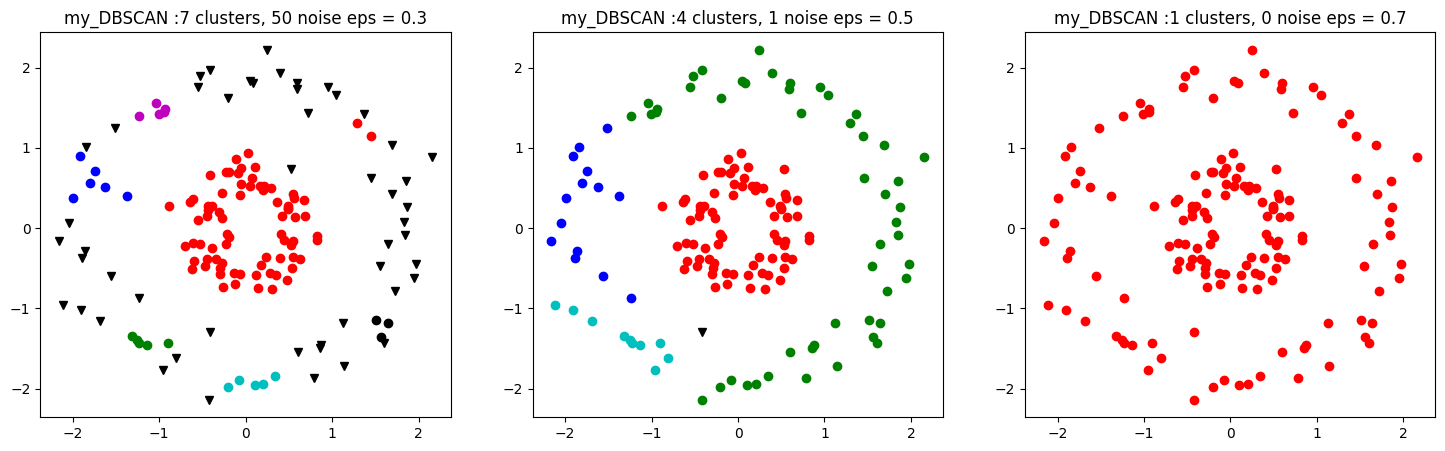

In [23]:
visualisation_cerc(3)

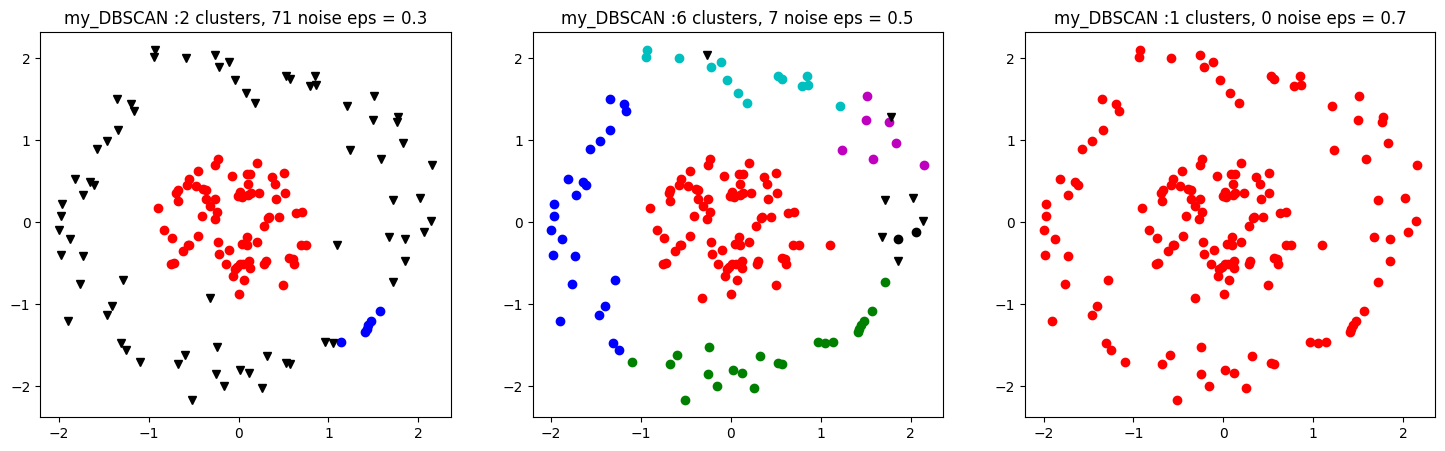

In [24]:
visualisation_cerc(5)

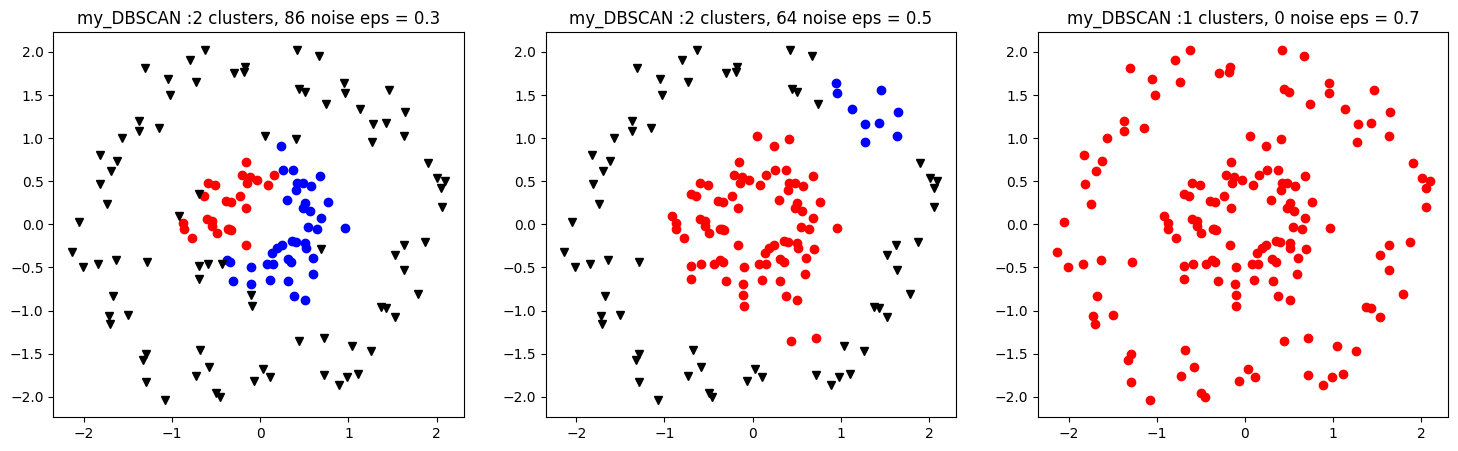

In [58]:
visualisation_cerc(7)

In [6]:
def estimate_EPS(Dist):
    N=Dist.shape[0]
    Diag=np.eye(N)*10000
    EPS=np.percentile(np.min(Dist+Diag,axis=0),95)
    return EPS

In [7]:
import math
def estime_MINPTS(X,Dist,eps):
    Nvoisins=[]
    N,pp=np.shape(X)
    for p in range(N):
        Nvoisins=Nvoisins+[len(EpsilonVoisinage(p,X,Dist,eps))]
    MINPS=math.ceil(np.percentile(np.array(Nvoisins,dtype=np.float64),5))
    return MINPS

/tmp/ipykernel_9983/1372430915.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
/tmp/ipykernel_9983/1372430915.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
/tmp/ipykernel_9983/1372430915.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])


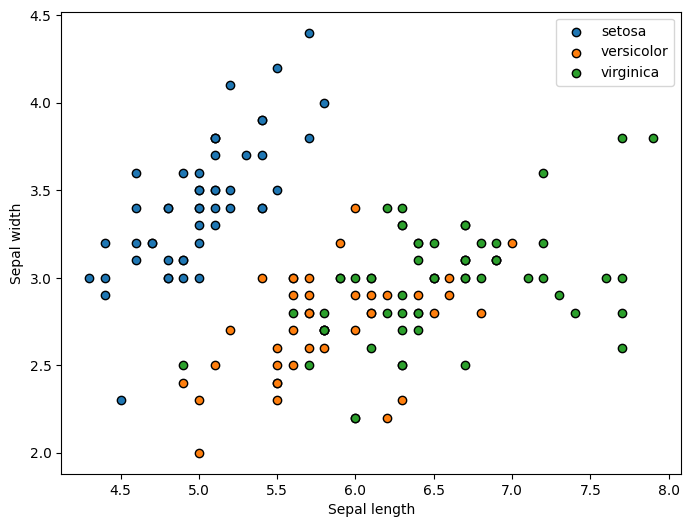

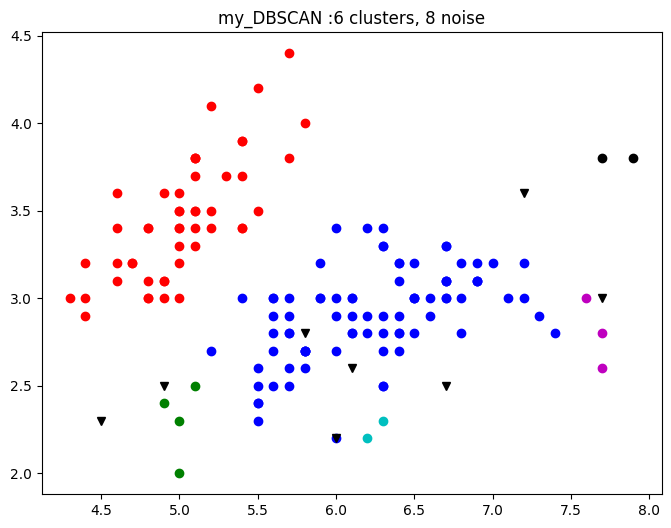

yy len: 150


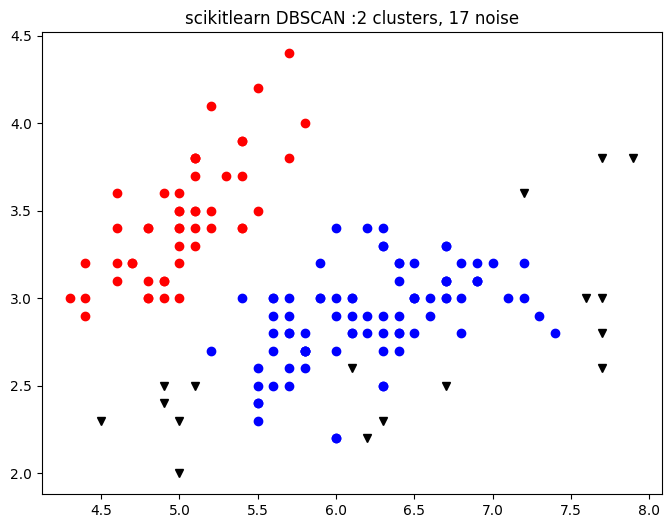

In [91]:
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    fig = plt.figure(2, figsize=(8, 6))
    plt.clf()
    plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
    plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
    plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(scatterpoints=1)
    N,r=np.shape(X)
    Dist = np.reshape(norm(X - X[0,:],axis=1),(N,1))
    eps = 0.5
    minpts = 5
    
    my_y = my_DBSCAN(X,eps,minpts)
    statistiques = np.unique(my_y,return_counts=True)
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
    
    fig = plt.figure(figsize=(8, 6))

    for k in range(1,K+1):
        plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
    plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')

    plt.title('my_DBSCAN :'+str(K)+' clusters, '+str(len(Bruit))+' noise')
    plt.show()

    # comparaison avec DBSCAN de scikit learn
    yy = DBSCAN(eps=eps,min_samples=minpts).fit_predict(X)
    statistiques = np.unique(yy,return_counts=True)
    Noise = [p for p in range(len(yy)) if yy[p]==-1]
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    
    print('yy len:',len(yy))
    fig = plt.figure(figsize=(8, 6))
    for k in range(K):
        plt.plot(X[yy==k,0], X[yy==k, 1], colors[(k+1)%n_colors]+'o')
    plt.plot(X[yy==-1, 0], X[yy==-1, 1], 'kv')

    plt.title('scikitlearn DBSCAN :'+str(K)+' clusters, '+str(len(Noise))+' noise')
    plt.show()    

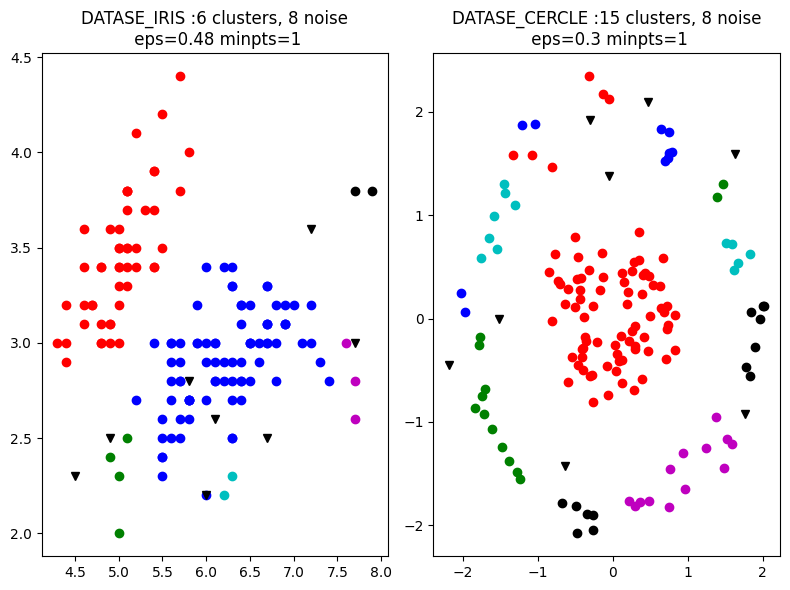

In [50]:
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    
    eps = 0.5
    minpts = 5
    
    my_y,e,mi = my_DBSCAN(X,eps,minpts)
    statistiques = np.unique(my_y,return_counts=True)
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
    
    fig = plt.figure(figsize=(8, 6))
    plt.subplot(1,2,1)
    for k in range(1,K+1):
        plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
    plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')
    plt.title('DATASE_IRIS :'+str(K)+' clusters, '+str(len(Bruit))+' noise\n'+' eps='+str(np.round(e,2))+ ' minpts='+str(mi))
    
    # comparaison avec DBSCAN de scikit learn
    X, y = make_circles(n_samples=150, factor=0.3, noise=0.1)
    X= StandardScaler().fit_transform(X)

    my_y,e,mi = my_DBSCAN(X,eps,minpts)
    statistiques = np.unique(my_y,return_counts=True)
    K = len(statistiques[0])-(1 if -1 in statistiques[0] else 0)
    Bruit = [p for p in range(len(my_y)) if my_y[p]==-1]
    
    plt.subplot(1,2,2)
    for k in range(1,K+1):
        plt.plot(X[my_y==k, 0], X[my_y==k, 1], colors[k%n_colors]+'o')
    plt.plot(X[my_y==-1, 0], X[my_y==-1, 1], 'kv')

    plt.title('DATASE_CERCLE :'+str(K)+' clusters, '+str(len(Bruit))+' noise\n'+' eps='+str(np.round(e,2))+ ' minpts='+str(mi))
    plt.savefig('ESTIMPARA')
    fig.tight_layout()
    plt.show()